In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading the image

In [51]:
def load_image(file):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    return img

In [52]:
def show_image(file):
    img = load_image(file)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.imshow(img_RGB)
    return plt.show()

In [53]:
def save_image(filename, image):
    saved_image = cv2.imwrite(filename, image)
    print(f"saved as {filename}")
    return None

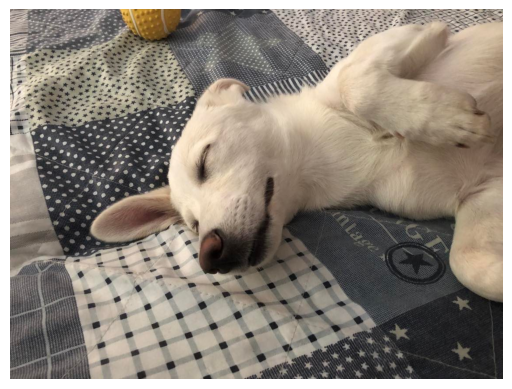

In [54]:
show_image("Iva.jpg")

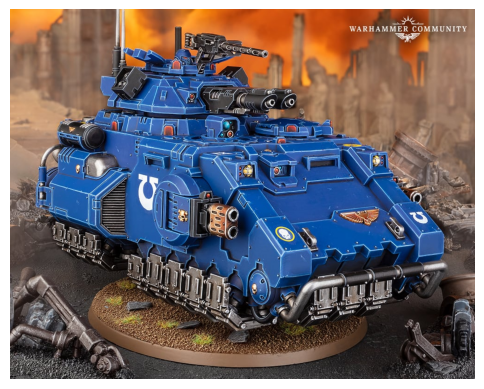

In [55]:
show_image("USMV.jpg")

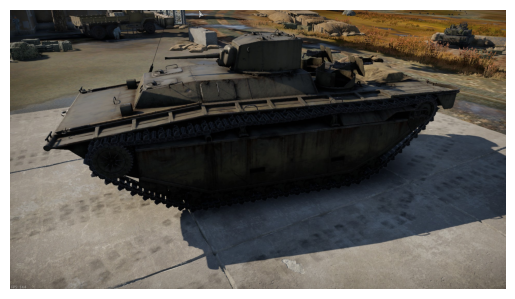

In [56]:
show_image("Tank.jpg")

# Sobel Edge Detector

In [57]:
def sobel(file):
    img = load_image(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    sobel_x = cv2.filter2D(gray, -1, kernel_x)
    sobel_y = cv2.filter2D(gray, -1, kernel_y)
    sobel = sobel_x + sobel_y
    filename = f"sobel_{file}"
    save_image(filename, sobel)
    return show_image(filename)

saved as sobel_Iva.jpg


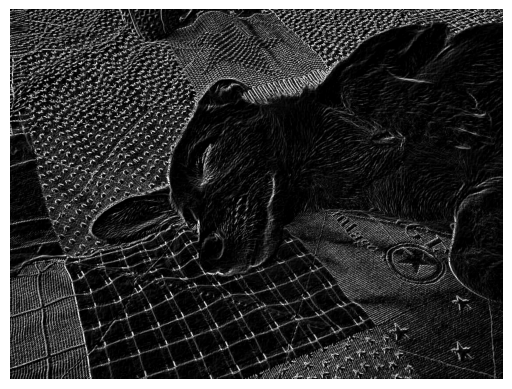

In [58]:
sobel("Iva.jpg")

saved as sobel_USMV.jpg


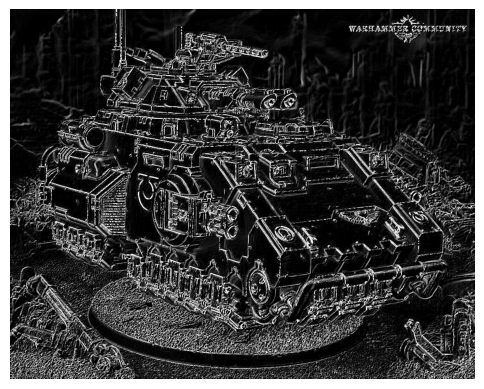

In [59]:
sobel("USMV.jpg")

saved as sobel_Tank.jpg


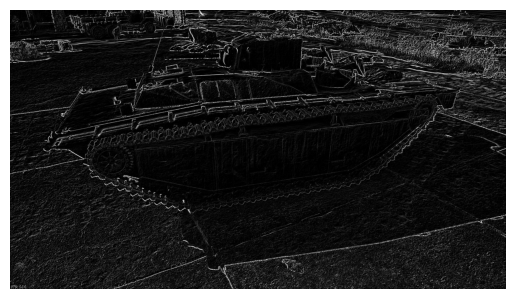

In [60]:
sobel("Tank.jpg")

# Canny Edge Detector

In [61]:
def canny(file):
    img = load_image(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(gray, 50, 150)
    filename = f"canny_{file}"
    save_image(filename, canny)
    return show_image(filename)

saved as canny_Iva.jpg


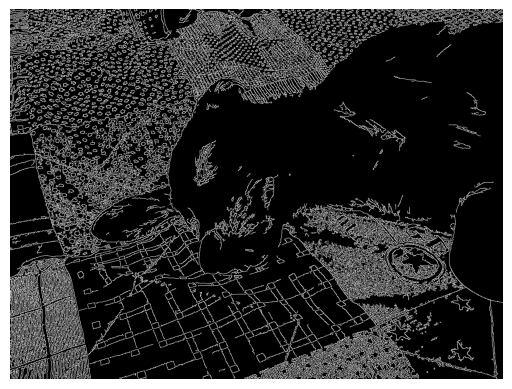

In [62]:
canny("Iva.jpg")

saved as canny_USMV.jpg


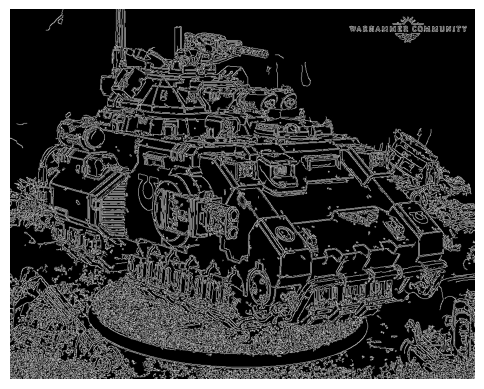

In [63]:
canny("USMV.jpg")

saved as canny_Tank.jpg


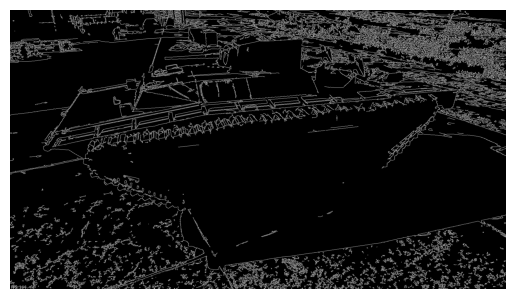

In [64]:
canny("Tank.jpg")

# Roberts Cross Edge Detector

In [65]:
def roberts(file):
    img = load_image(file)
    kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
    gx = cv2.filter2D(img, -1, kernel_x)
    gy = cv2.filter2D(img, -1, kernel_y)
    magnitude = np.sqrt(np.square(gx) + np.square(gy))
    magnitude = np.uint8(magnitude / np.max(magnitude) * 255)
    filename = f"roberts_{file}"
    save_image(filename, magnitude)
    return show_image(filename)

saved as roberts_Iva.jpg


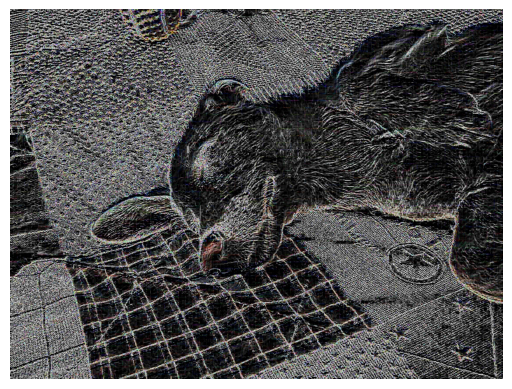

In [66]:
roberts("Iva.jpg")

saved as roberts_USMV.jpg


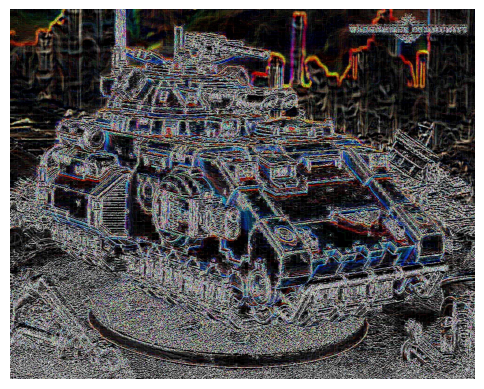

In [67]:
roberts("USMV.jpg")

saved as roberts_Tank.jpg


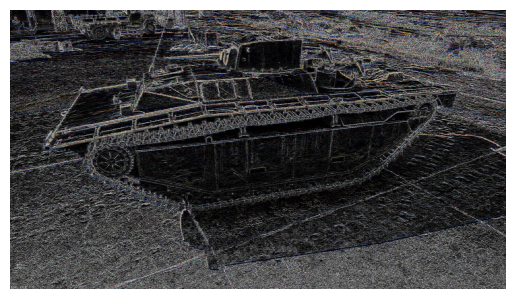

In [68]:
roberts("Tank.jpg")

# Conclusion

In [69]:
def colored(file):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_RGB

In [70]:
def compare(file, sobel, canny, roberts):
    fig, axs = plt.subplots(2, 2, figsize=(10,8))
    axs[0, 0].imshow(colored(file))
    axs[0, 0].axis("off")
    axs[0, 0].set_title("Original")
    axs[0, 1].imshow(colored(sobel))
    axs[0, 1].axis("off")
    axs[0, 1].set_title("Sobel")
    axs[1, 0].imshow(colored(canny))
    axs[1, 0].axis("off")
    axs[1, 0].set_title("Canny")
    axs[1, 1].imshow(colored(roberts))
    axs[1, 1].axis("off")
    axs[1, 1].set_title("Roberts")
    plt.show()

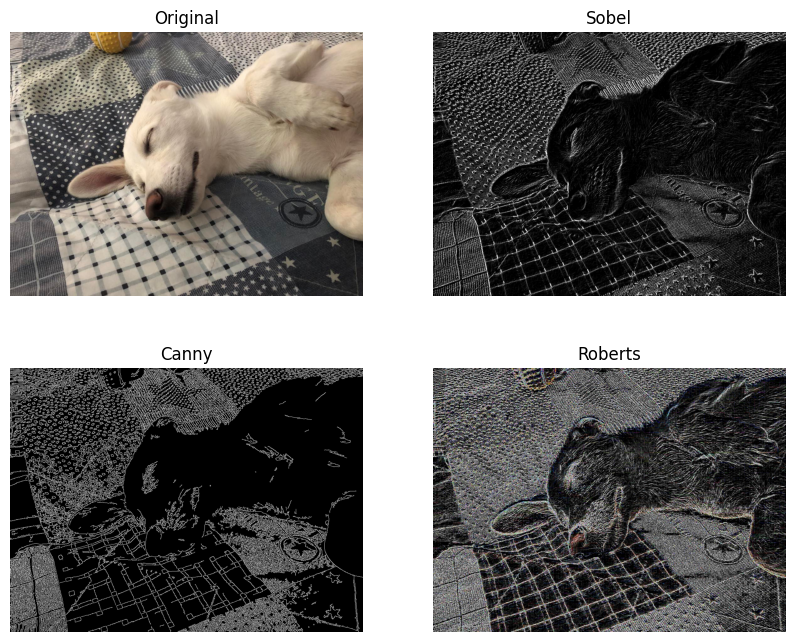

In [71]:
compare("Iva.jpg", "sobel_Iva.jpg", "canny_Iva.jpg", "roberts_Iva.jpg")

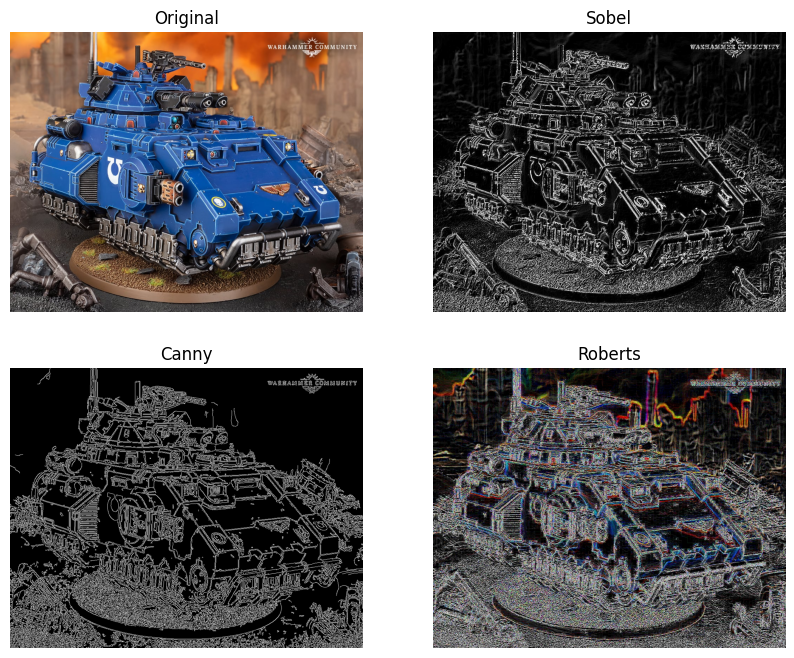

In [72]:
compare("USMV.jpg", "sobel_USMV.jpg", "canny_USMV.jpg", "roberts_USMV.jpg")

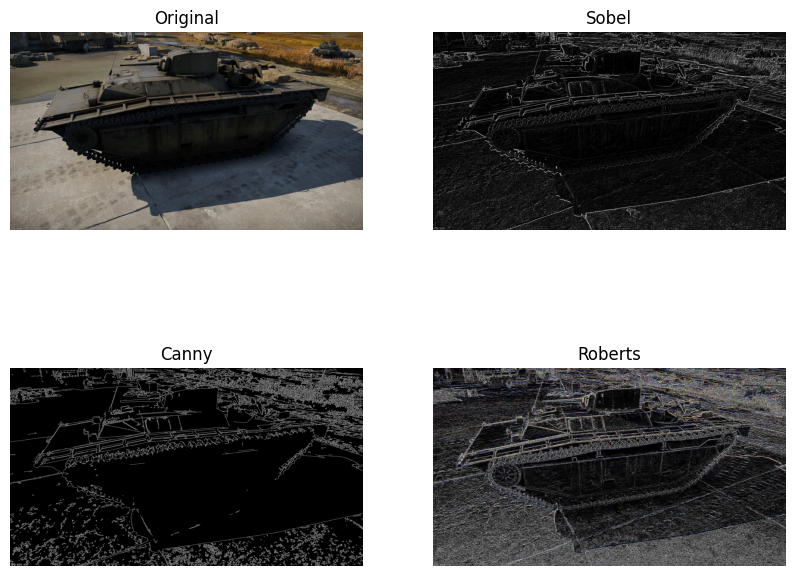

In [73]:
compare("Tank.jpg", "sobel_Tank.jpg", "canny_Tank.jpg", "roberts_Tank.jpg")

**Tried Sobel, Canny and Roberts edge detectors with 3 different pictures. Real photo, rendered or real photo and screenshot.**

**Sobel edge detector performed good on every task, best with the real photo.**

**Canny edge detector did poorly on screenshot.**

**Roberts edge detector made it almost unreadable with the second image, but excelled with screenshot.**

**Overall, Canny edge detecor provides most simplified and clear result, however, more adjusting needed to get the optimal result.**